# 6.5 Unsupervised Machine Learning - Clustering
### New York Citi Bikes

## 01 Import Data

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
# Set Path
path = r'C:\Users\cshat\09-2023 Citi Bikes Project'

In [3]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_clean.csv'), index_col = False)

## 02 Clean Data
Data was already cleaned during previous tasks.

In [4]:
df.head()

,Unnamed: 0,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,5,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2


In [5]:
df.shape

(42975, 17)

In [6]:
df.describe()

,Unnamed: 0,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
count,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000
mean,24966.306527,14.085678,437.238860,40.734477,-73.990947,434.608842,40.734070,-73.991241,770.459639,1975.693031,1.247772
std,14446.487376,4.933038,340.910199,0.019599,0.012368,332.861774,0.019601,0.012376,523.425686,10.903197,0.431831
min,0.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1934.000000,0.000000
25%,12444.500000,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720828,-74.000271,395.000000,1968.000000,1.000000
50%,24957.000000,15.000000,402.000000,40.736245,-73.990765,402.000000,40.735877,-73.990985,621.000000,1978.000000,1.000000
75%,37486.500000,18.000000,485.000000,40.749718,-73.981923,483.000000,40.749013,-73.982578,999.000000,1984.000000,1.000000
max,49999.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000


In [7]:
# Check for Missing Values
df.isnull().sum()

Unnamed: 0                 0
day_of_week                0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
dtype: int64

In [8]:
# Check for Duplicates
df_dup = df[df.duplicated()] 

In [9]:
df_dup

,Unnamed: 0,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender


In [10]:
# Create Subset
df.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [11]:
df_sub = df[['start_hour', 'trip_duration', 'birth_year', 'gender']]

In [12]:
df_sub.head()

,start_hour,trip_duration,birth_year,gender
0,18,993,1968.0,2
1,18,581,1983.0,1
2,19,361,1989.0,1
3,11,561,1988.0,2
4,22,427,1986.0,2


## 03 Elbow Technique

In [13]:
# Define the Range
num_cl = range(1, 10)

In [14]:
# Define k-means Clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
# Apply k-means Algorithm 
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 

C:\Users\cshat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cshat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cshat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cshat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cshat\anaconda3\lib\site-packages\sklearn\clust

In [16]:
score

[-11779940468.465952,
 -3833004090.860034,
 -1869587453.5118613,
 -1092480420.8766816,
 -710011535.928165,
 -492910749.9155732,
 -362641142.4619253,
 -279999204.5887251,
 -222291423.19951594]

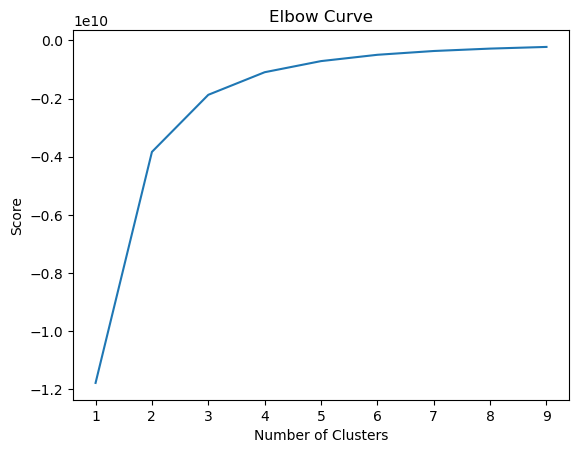

In [17]:
# Plot Elbow Curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve looks like it starts to flatten around 3 so I will be choosing 3 for number of clusters.

## 04 k-means Clustering

In [18]:
# Create k-means Object
kmeans = KMeans(n_clusters = 3)

In [19]:
# Fit k-means Object to Dataframe 
kmeans.fit(df_sub)

C:\Users\cshat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
# Attach New Column
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\cshat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cshat\AppData\Local\Temp\ipykernel_1344\3532183545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [21]:
df_sub.head()

,start_hour,trip_duration,birth_year,gender,clusters
0,18,993,1968.0,2,0
1,18,581,1983.0,1,1
2,19,361,1989.0,1,1
3,11,561,1988.0,2,1
4,22,427,1986.0,2,1


In [22]:
# Count Data Points in Clusters
df_sub['clusters'].value_counts()

1    25770
0    13037
2     4168
Name: clusters, dtype: int64

## 05 Plot Clusters

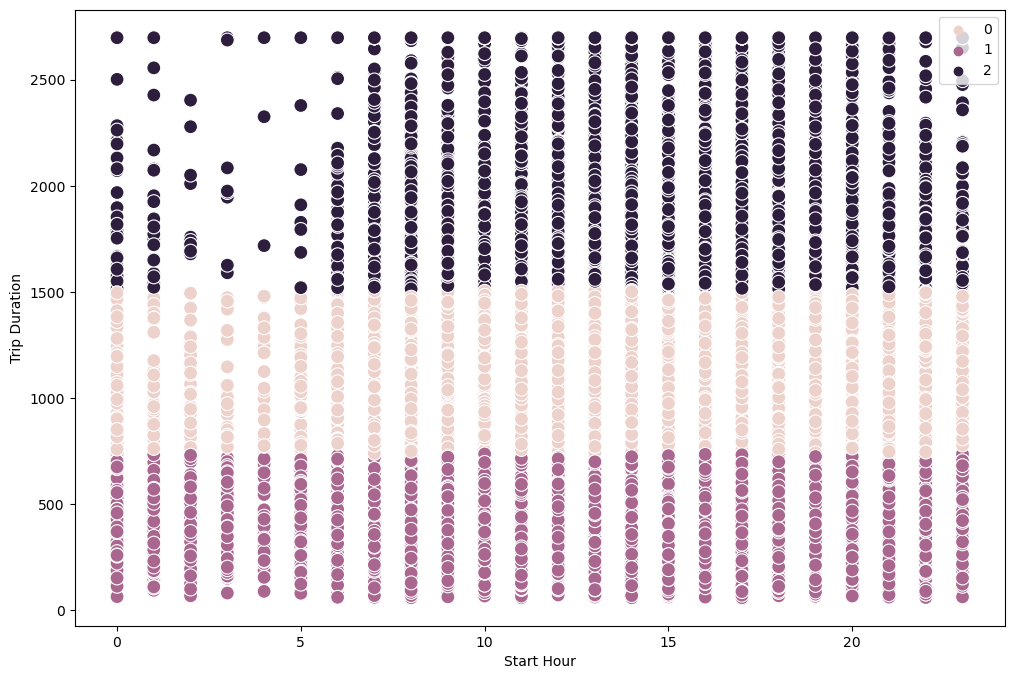

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['start_hour'], y=df_sub['trip_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')
plt.show()

There is definitely a pattern to investigate further.

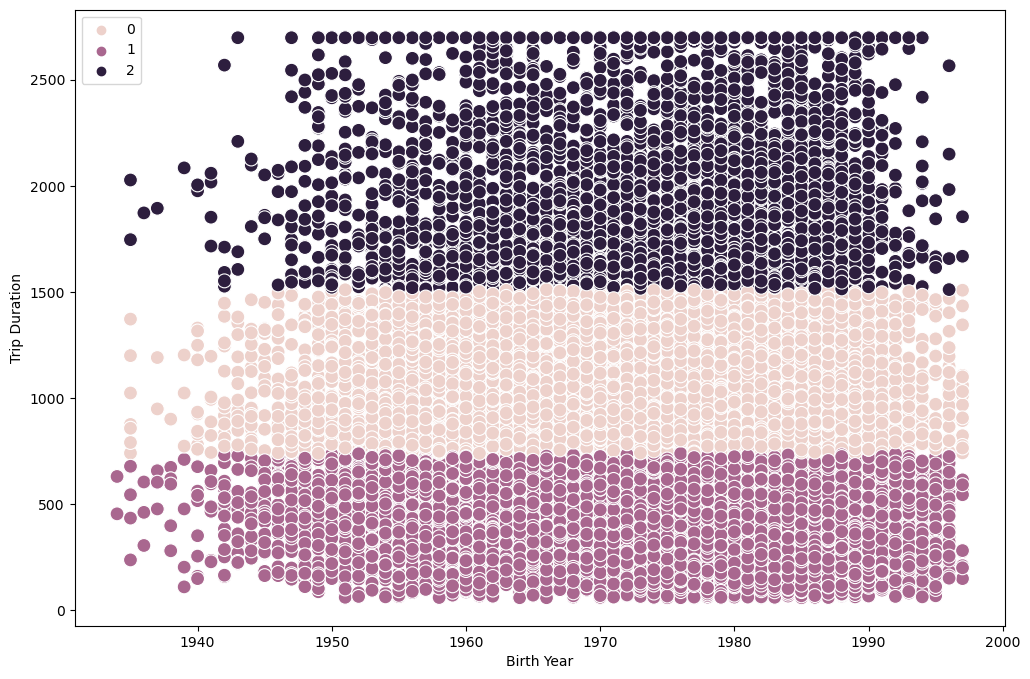

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['birth_year'], y=df_sub['trip_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration')
plt.show()

All ages show the same pattern as the previous plot in regards to trip duration.

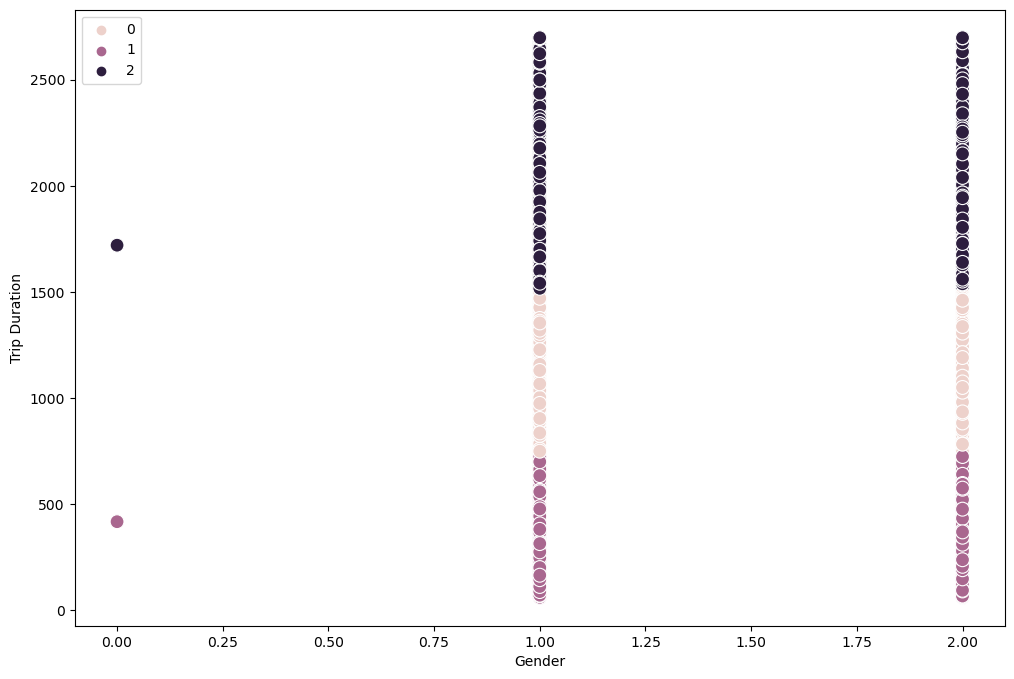

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['gender'], y=df_sub['trip_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Gender')
plt.ylabel('Trip Duration')
plt.show()

Both genders show the same pattern that was seen in the previous plots.

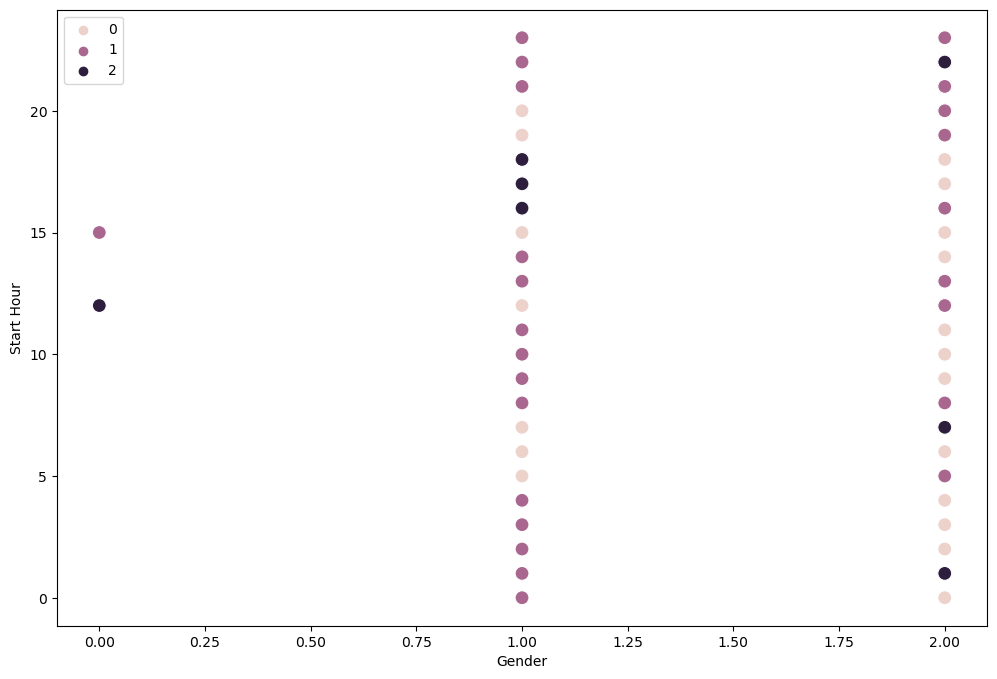

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['gender'], y=df_sub['start_hour'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Gender')
plt.ylabel('Start Hour')
plt.show()

There is a slight difference between genders when it comes to the hour trips are started.

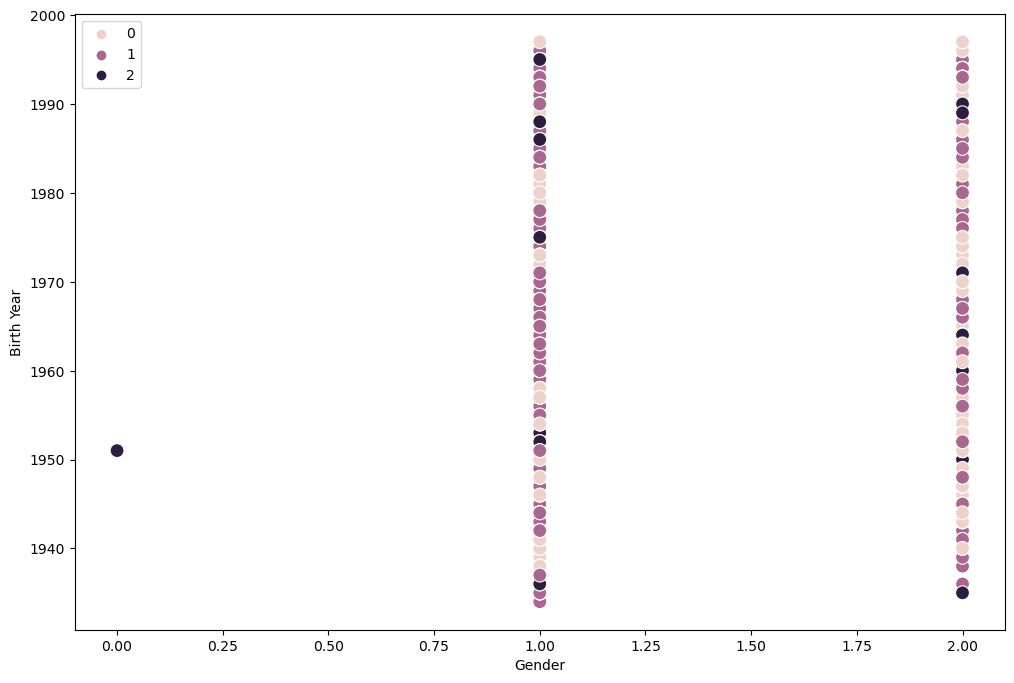

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['gender'], y=df_sub['birth_year'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Gender')
plt.ylabel('Birth Year')
plt.show()

There is a slight difference regarding gender and age.

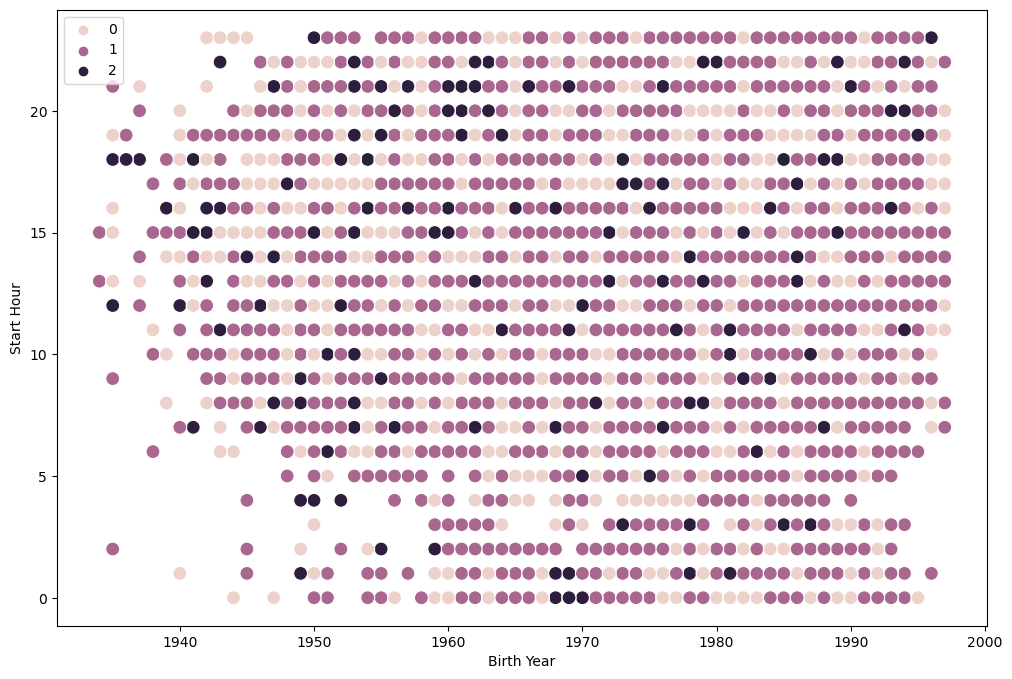

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['birth_year'], y=df_sub['start_hour'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Birth Year')
plt.ylabel('Start Hour')
plt.show()

There is no obvious pattern here.

## 06 Descriptive Statistics

In [29]:
# Rename Clusters as Colors
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'black'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\cshat\AppData\Local\Temp\ipykernel_1344\1608962916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'black'


In [30]:
df_sub.groupby('cluster').agg({'trip_duration':['mean','median'], 'start_hour':['mean','median'], 'birth_year':['mean','median'], 'gender':['mean','median']})

trip_duration         start_hour          birth_year          \
                 mean  median       mean median         mean  median   
cluster                                                                
black     1980.950816  1875.5  14.595729   16.0  1974.557821  1977.0   
pink      1040.826264  1002.0  14.268773   15.0  1975.446038  1978.0   
purple     437.898642   437.0  13.910555   15.0  1976.001591  1978.0   

           gender         
             mean median  
cluster                   
black    1.324856    1.0  
pink     1.290251    1.0  
purple   1.213815    1.0

The only variable showing a significant difference among clusters is "trip_duration".

### Black
This cluster reprisents the group of riders who take medium length trips. They are also in the middle for every other variable. 

### Pink
This cluster reprisents the group of riders who take short trips. Other minor characterstics are that they may be younger, male, and take trips earlier in the afternoon. Pink shows the least difference between mean and median.

### Purple
This cluster reprisents the group of riders who take long trips. Other minor characterstics are that they may be older, female, and take trips later in the afternoon. Purple shows the most difference between mean and median.

## 07 Conclusion

Most of the variables in this dataset were not applicable for this analysis. The 4 variables chosen were crossed with eachother to look for any patterns. The main insight found was the 3 distinct groups for trip duration that followed the same pattern for gender, age, and start hour. There was also a slight difference in cluster pattern when analyzing gender vs age and gender vs start time.

It could be beneficial to investigate further into the trip duration and gender variables (separately, they do not correlate).